In [1]:
from metadrive.envs.metadrive_env import MetaDriveEnv
from metadrive.component.map.base_map import BaseMap
from metadrive.component.map.pg_map import MapGenerateMethod
from metadrive.examples.ppo_expert.torch_expert import torch_expert as expert

import logging
from IPython.display import Image, clear_output
import pandas as pd
from pprint import pprint

from PIL import Image
import numpy as np

In [2]:
def create_env(seed=0):
    # ===== Termination Scheme =====
    termination_sceme = dict(
        out_of_route_done=False,
        on_continuous_line_done=False,
        crash_vehicle_done=True,
        crash_object_done=True,
        crash_human_done=True,
    )
    # ===== Map Config =====
    map_config = {
        BaseMap.GENERATE_TYPE: MapGenerateMethod.BIG_BLOCK_NUM,
        BaseMap.GENERATE_CONFIG: 5,  # 20 block
    }

    cfg = dict(
        # use_render=True,
        horizon=1000,  # figure out what do do aboutit
        record_episode=False,
        start_seed=seed,
        map_config=map_config,
        **termination_sceme
    )
    env = MetaDriveEnv(config=cfg)
    return env

In [3]:
def run_scenario(seed: int = 0):
    env = create_env(seed)
    _, step_info = env.reset(seed)

    while True:
        # get action from expert driving
        action = expert(env.agent, deterministic=True)
        obs, reward, tm, tr, step_info = env.step(action)

        if tm or tr:
            break

    # save_map_data(env)
    env.close()

In [4]:
# run_scenario(10)

In [5]:
env = create_env(seed=123)
obs, step_info = env.reset()

[INFO] Environment: MetaDriveEnv
[INFO] MetaDrive version: 0.4.2.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): 1000
[INFO] Assets version: 0.4.2.3
[INFO] Known Pipes: glxGraphicsPipe
[INFO] Start Scenario Index: 123, Num Scenarios : 1


In [6]:
step_info

{'navigation_command': 'forward',
 'navigation_forward': True,
 'navigation_left': False,
 'navigation_right': False,
 'overtake_vehicle_num': 0,
 'velocity': 0.0,
 'steering': 0.0,
 'acceleration': 0.0,
 'step_energy': 0.0,
 'episode_energy': 0.0,
 'policy': 'EnvInputPolicy',
 'crash_vehicle': False,
 'crash_object': False,
 'crash_building': False,
 'crash_human': False,
 'crash_sidewalk': False,
 'out_of_road': False,
 'arrive_dest': False,
 'max_step': False,
 'env_seed': 123,
 'crash': False,
 'step_reward': 0.0,
 'route_completion': 0.007659240007649569,
 'cost': 0}

In [7]:
for step in range(5):

    # get action from expert driving, or a dummy action
    action = expert(env.agent, deterministic=True)
    obs, reward, tm, tr, step_info = env.step(action)

    if tm or tr:
        break

[INFO] Use Torch PPO expert.


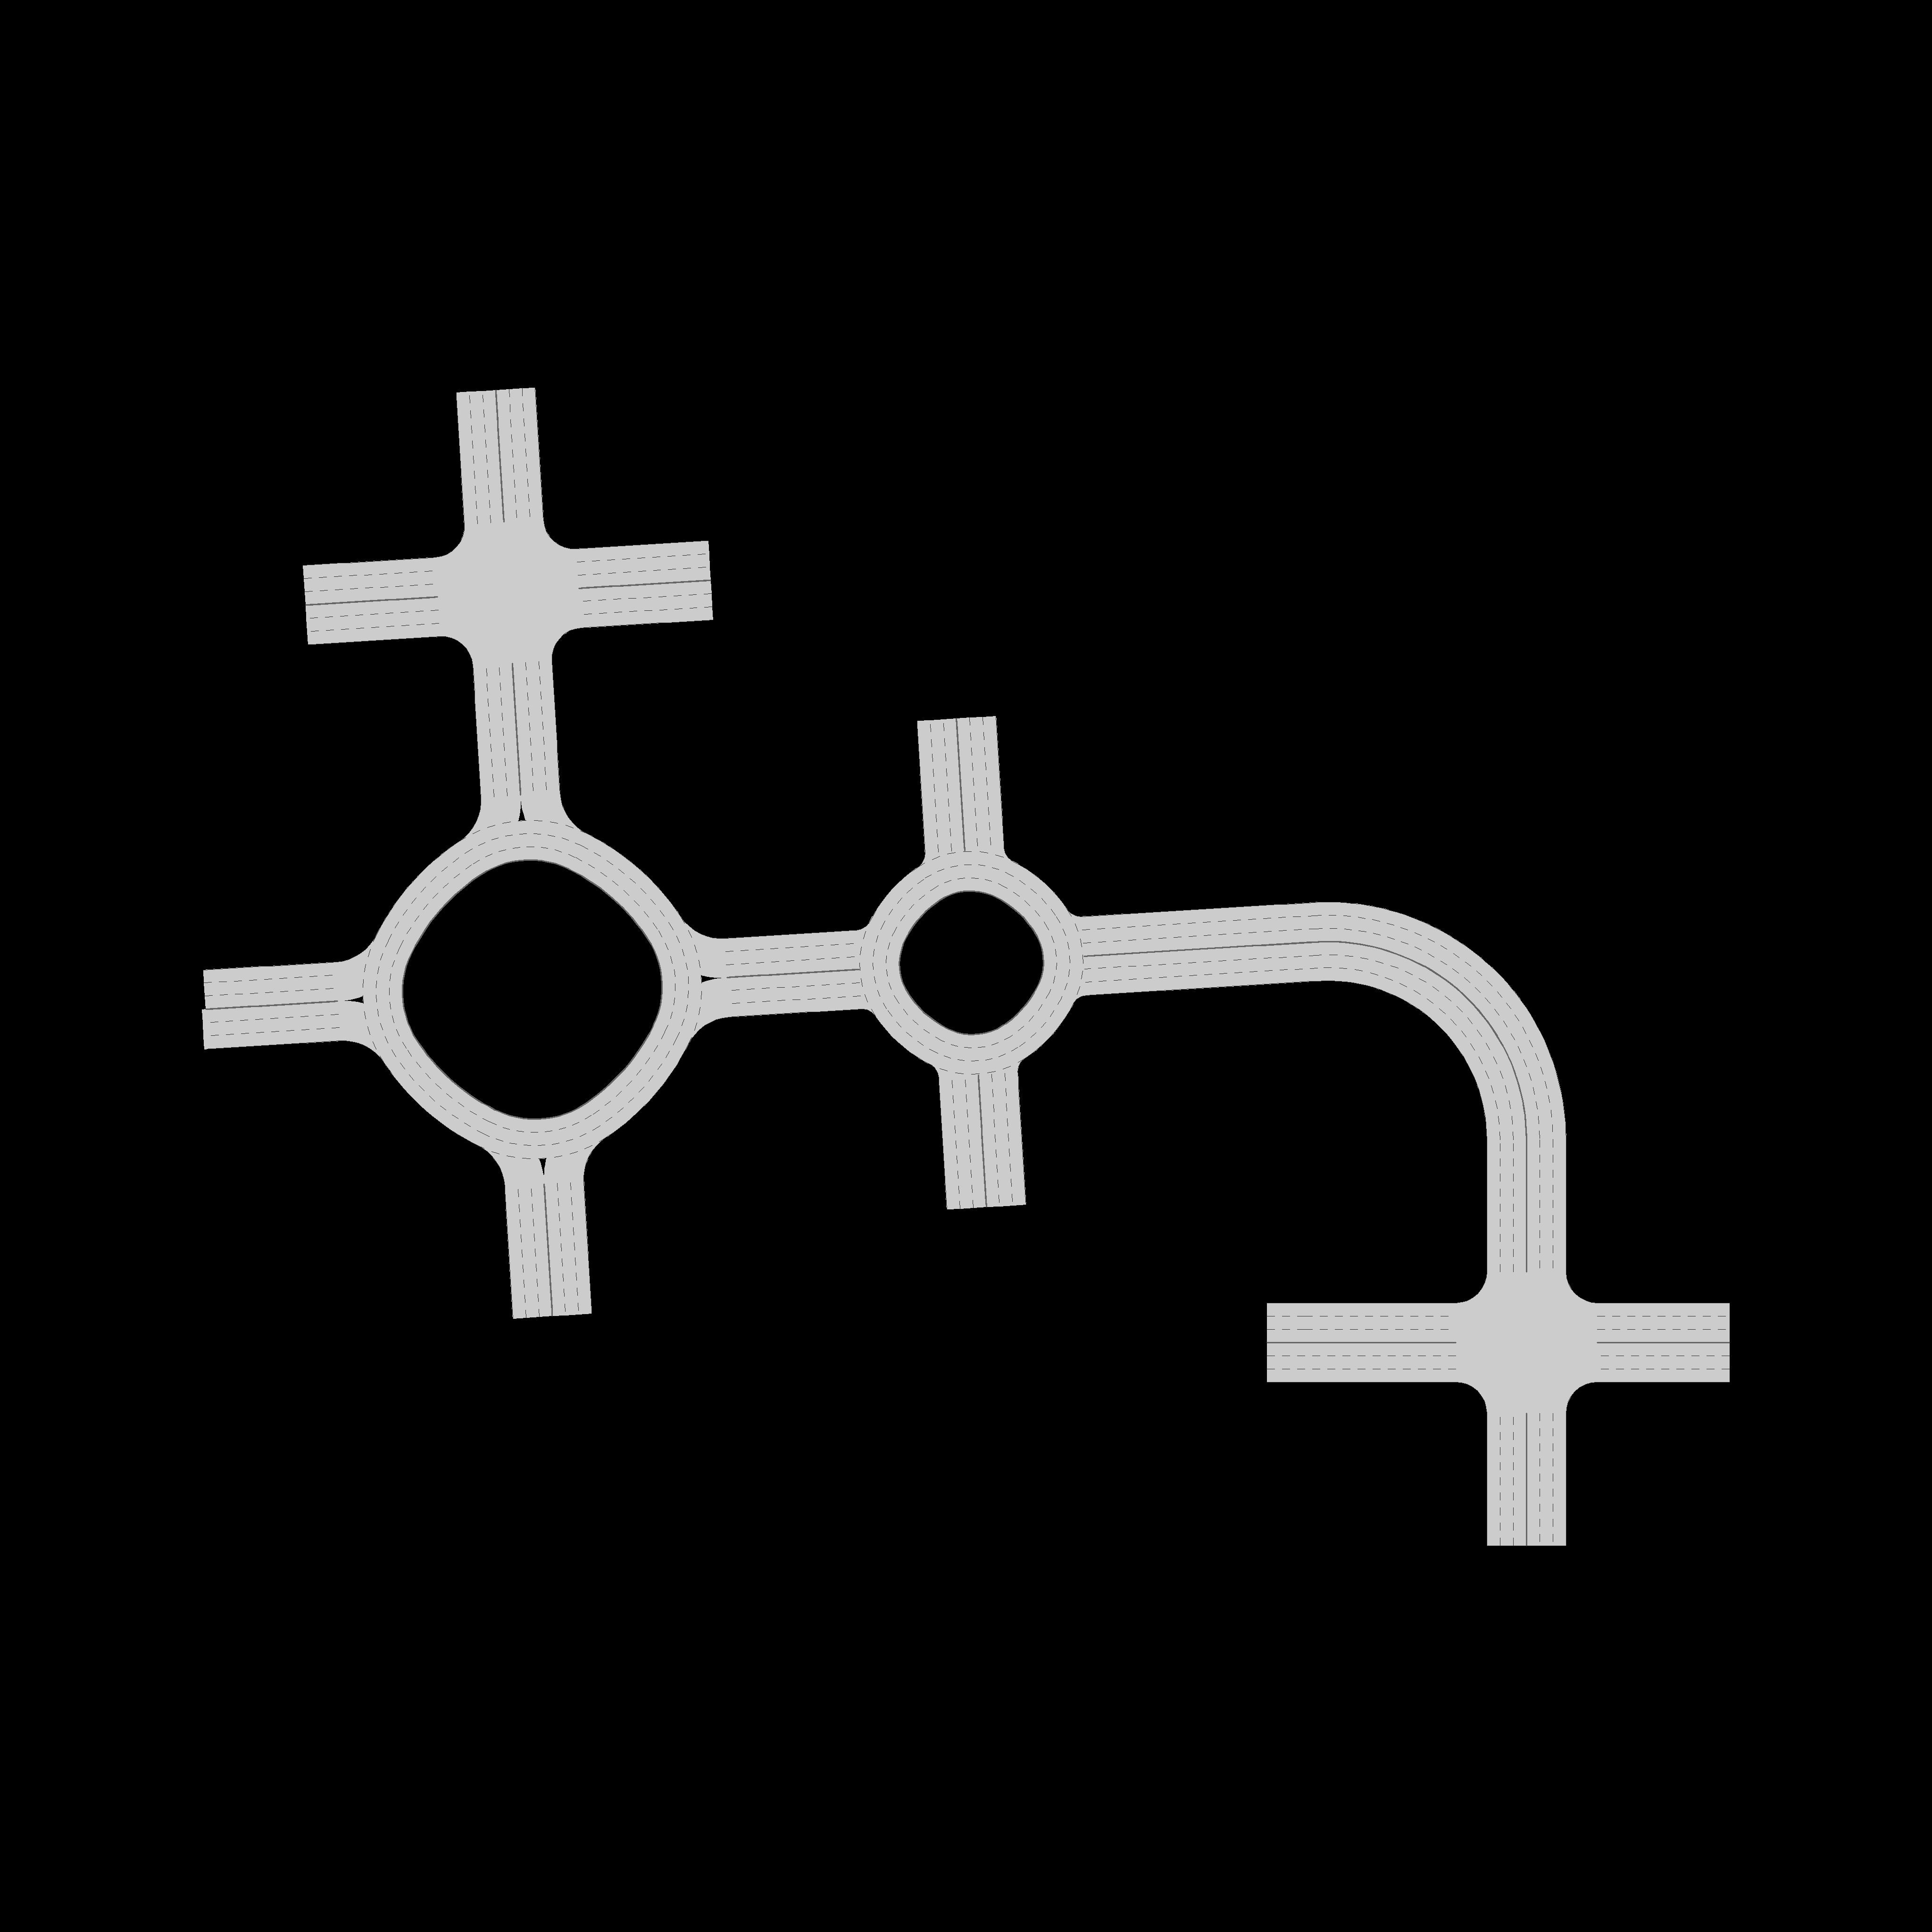

In [8]:
def get_map_img(env):
    map = env.current_map.get_semantic_map(
        env.current_map.get_center_point(),
    )
    map = map.squeeze()  # reduce dimensionality
    map = (map * 255 * 4).astype(np.uint8)
    img = Image.fromarray(map)
    return img


get_map_img(env)

In [9]:
step_info

{'navigation_command': 'forward',
 'navigation_forward': True,
 'navigation_left': False,
 'navigation_right': False,
 'overtake_vehicle_num': 0,
 'velocity': 1.4503111357776524,
 'steering': -0.014887642115354538,
 'acceleration': 1.0,
 'step_energy': 0.004171544994169938,
 'episode_energy': 0.010840417571402755,
 'policy': 'EnvInputPolicy',
 'action': [-0.014887642, 1.0],
 'raw_action': (-0.014887642, 1.0),
 'crash_vehicle': False,
 'crash_object': False,
 'crash_building': False,
 'crash_human': False,
 'crash_sidewalk': False,
 'out_of_road': False,
 'arrive_dest': False,
 'max_step': False,
 'env_seed': 123,
 'crash': False,
 'step_reward': 0.12834780361441742,
 'route_completion': 0.008149755947367523,
 'cost': 0,
 'episode_reward': 0.3397908924073134,
 'episode_length': 5}

In [10]:
import json

map = env.current_map
map_data = map.get_meta_data()
# pprint(map_data["block_sequence"])

In [11]:
total_length = env.agent.navigation.total_length
travelled = env.agent.navigation.travelled_length

travelled / total_length

0.008149755947367523

In [12]:
# with open("dupa.json", "w") as f:
#     json.dump(map_data["block_sequence"], f, indent=4)